In [1]:
# ------ >>>>> BINARY CLASSIFICATION FULL STACK <<<<< --------

# ------------- data analysis and wrangling-------------------
import pandas as pd
import numpy as np
import random as rnd
from pandas import DataFrame
import warnings
warnings.filterwarnings("ignore")
# ------------------------------------------------------------

# ------- import các tool visualization ----------------------
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# ------------------------------------------------------------

# ----- import các thuật toán machine learning----------------
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
# ------------------------------------------------------------

# -------- import các thuật toán tính toán sai số ------------
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
# ------------------------------------------------------------

In [2]:
data = pd.read_csv(r'C:\HỌC TẬP\PYTHON LEARNING\DATA\TelcoChurn.csv')
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [4]:
data=data.drop(['customerID'], axis=1) # drop các data không cần phân loại
data=pd.get_dummies(data)
data.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0


In [5]:
data=data.drop(['PaperlessBilling_No','gender_Female'], axis=1)

In [6]:
data = data.drop('Churn_No',axis = 1)

In [7]:
data1 = data
from  sklearn.model_selection import train_test_split
X = data1.drop('Churn_Yes',axis = 1)
Y = data1['Churn_Yes']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=2)

In [8]:
# TÍNH TOÁN CHỈ SỐ CỦA 9 MÔ HÌNH CLASSIFICATION MACHINE LEARNING CƠ BẢN
# Logistic Regression
logreg = LogisticRegression() # không thể cải thiện độ chính xác
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
b1 = precision_recall_fscore_support(Y_test, Y_pred,average='weighted')
c1 = confusion_matrix(Y_test, Y_pred)
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)
# K Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
b2 = precision_recall_fscore_support( Y_test, Y_pred, average='weighted')
c2 = confusion_matrix(Y_test, Y_pred)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
b3 = precision_recall_fscore_support(Y_test, Y_pred, average='weighted')
c3 = confusion_matrix(Y_test, Y_pred)
acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)
# Decision Tree
decision_tree = DecisionTreeClassifier(max_depth = 5)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
b4 = precision_recall_fscore_support(Y_test, Y_pred, average='weighted')
c4 = confusion_matrix(Y_test, Y_pred)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
# Random Forest
random_forest = RandomForestClassifier(max_depth = 5)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
b5 = precision_recall_fscore_support(Y_test, Y_pred, average='weighted')
c5 = confusion_matrix(Y_test, Y_pred)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
b6 = precision_recall_fscore_support(Y_test, Y_pred, average='weighted')
c5 = confusion_matrix(Y_test, Y_pred)
acc_perceptron = round(perceptron.score(X_test, Y_test) * 100, 2)
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
b7 = precision_recall_fscore_support(Y_test, Y_pred, average='weighted')
c7 = confusion_matrix(Y_test, Y_pred)
acc_linear_svc = round(linear_svc.score(X_test, Y_test) * 100, 2)

----------------------------------- XÁC ĐỊNH ĐỘ CHÍNH XÁC CỦA MÔ HÌNH -----------------------------------

In [9]:
models = pd.DataFrame({
    'Model': ['Logistic Regression *', 'K Neighbors Classifier', 'Gaussian Naive Bayes', 
              'Decision Tree', 'Random Forest', 'Perceptron *', 
              'Linear SVC *'],
    'Accuracy Score': [acc_log, acc_knn , acc_gaussian,
              acc_decision_tree, acc_random_forest, acc_perceptron, 
              acc_linear_svc],
#    'Precision': [b1[0],b2[0],b3[0],b4[0],b5[0],b6[0],b7[0],b8[0],b9[0]],
#    'Recall': [b1[1],b2[1],b3[1],b4[1],b5[1],b6[1],b7[1],b8[1],b9[1]],
    'F1 Score': [b1[2],b2[2],b3[2],b4[2],b5[2],b6[2],b7[2]]}) # nếu ko đưa [2] vào, hệ thống xuất ra cả precision & recall
models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score,F1 Score
0,Logistic Regression *,79.27,0.787063
4,Random Forest,79.18,0.778662
3,Decision Tree,77.43,0.768533
1,K Neighbors Classifier,76.53,0.753157
6,Linear SVC *,75.77,0.676129
5,Perceptron *,74.68,0.748350
2,Gaussian Naive Bayes,68.39,0.703704


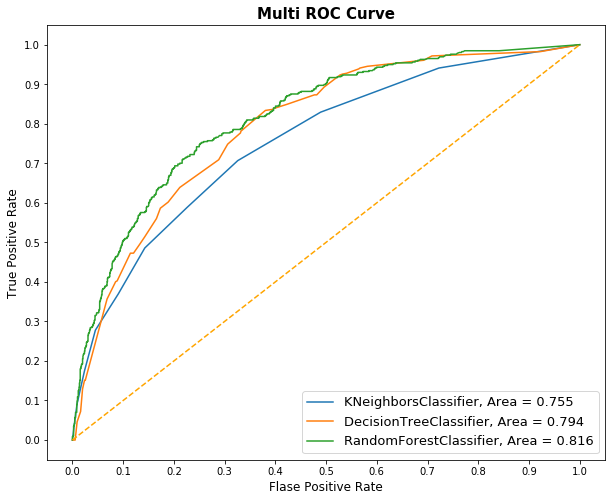

In [10]:
# XÁC ĐỊNH ĐỘ CHÍNH XÁC CỦA TỪNG MÔ HÌNH DỰA VÀO ROC CURVE
X = X
y = Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,random_state=1234)
from sklearn.metrics import roc_curve, roc_auc_score
# NHỮNG MÔ HÌNH 
classifiers = [KNeighborsClassifier(n_neighbors=10), 
               DecisionTreeClassifier( max_depth = 6,random_state=1234), # HIỆU CHỈNH MAX DEPTH
               RandomForestClassifier(max_depth = 10, random_state=1234)] # HIỆU CHỈNH MAX DEPTH
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
result_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(10,8))
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, Area = {:.3f}".format(i, result_table.loc[i]['auc']))  
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=12)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Multi ROC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

điểm tối ưu K Neighbors Classifier K = 14 & độ chính xác = 77.57 %
điểm tối ưu RANDOM FOREST K = 7 & độ chính xác = 79.51 %
điểm tối ưu DECISION TREE K = 4 & độ chính xác = 78.7 %


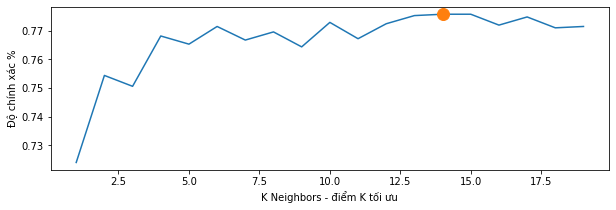

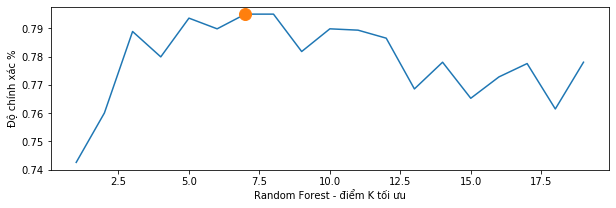

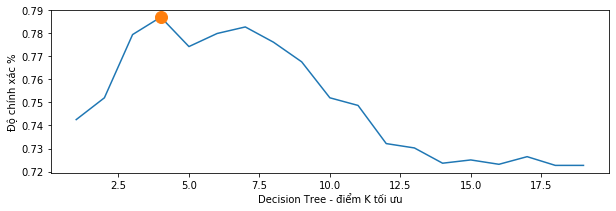

In [11]:
# ---------------- KNeighborsClassifier -------------------------------------------
X = data1.drop('Churn_Yes',axis = 1)
Y = data1['Churn_Yes']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=2)
test_accuracy = []
neighbors_settings = range(1,20)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, Y_train)
    test_accuracy.append(clf.score(X_test, Y_test))
plt.figure(figsize=(10,3))
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Độ chính xác %")
plt.xlabel("K Neighbors - điểm K tối ưu")
# --------------- biểu diễn vị trí k tối ưu --------------------------------
n_max = max(test_accuracy)
plt.plot(test_accuracy.index(n_max)+1,n_max,marker='o', markersize=12)
print('điểm tối ưu K Neighbors Classifier K =',test_accuracy.index(n_max)+1,'& độ chính xác =',round(n_max*100,2),'%')
knn_max = test_accuracy.index(n_max)+1
# ---------------- RANDOM FOREST -------------------------------------------
data2=data
X = data2.drop('Churn_Yes',axis = 1)
Y = data2['Churn_Yes']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=2)
test_accuracy = []
ic = range(1,20)
for i in ic:
    random_forest = RandomForestClassifier(max_depth = i)
    random_forest.fit(X_train, Y_train)
    test_accuracy.append(random_forest.score(X_test, Y_test))
plt.figure(figsize=(10,3))
plt.plot(ic, test_accuracy, label="test accuracy")
plt.ylabel("Độ chính xác %")
plt.xlabel("Random Forest - điểm K tối ưu")
# --------------- biểu diễn vị trí k tối ưu --------------------------------
n_max_rd = max(test_accuracy)
plt.plot(test_accuracy.index(n_max_rd)+1,n_max_rd,marker='o', markersize=12)
print('điểm tối ưu RANDOM FOREST K =',test_accuracy.index(n_max_rd)+1,'& độ chính xác =',round(n_max_rd*100,2),'%')
randomforest_max = test_accuracy.index(n_max_rd)+1
# ---------------- DECISION TREE -------------------------------------------
data3=data
X = data3.drop('Churn_Yes',axis = 1)
Y = data3['Churn_Yes']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=2)
test_accuracy = []
ic = range(1,20)
for i in ic:
    decision_tree = DecisionTreeClassifier(max_depth = i)
    decision_tree.fit(X_train, Y_train)
    test_accuracy.append(decision_tree.score(X_test, Y_test))
plt.figure(figsize=(10,3))
plt.plot(ic, test_accuracy, label="test accuracy")
plt.ylabel("Độ chính xác %")
plt.xlabel("Decision Tree - điểm K tối ưu")
# --------------- biểu diễn vị trí k tối ưu --------------------------------
n_max_dt = max(test_accuracy)
plt.plot(test_accuracy.index(n_max_dt)+1,n_max_dt,marker='o', markersize=12)
print('điểm tối ưu DECISION TREE K =',test_accuracy.index(n_max_dt)+1,'& độ chính xác =',round(n_max_dt*100,2),'%')
decisiontree_max = test_accuracy.index(n_max_dt)+1

--------------------------------------------------- XÁC ĐỊNH YẾU TỐ QUAN TRỌNG THEO THỨ TỰ ---------------------------------------------------

In [12]:
data2=data
X = data2.drop('Churn_Yes',axis = 1)
Y = data2['Churn_Yes']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=2)
feature_list = list(X.columns)
rf = RandomForestClassifier(max_depth = randomforest_max)
rf.fit(X_train, Y_train);

importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance*100,2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Var: {:40} & Importance %: {}'.format(*pair)) for pair in feature_importances];

Var: Contract_Month-to-month                  & Importance %: 18.9
Var: tenure                                   & Importance %: 17.73
Var: TotalCharges                             & Importance %: 8.34
Var: OnlineSecurity_No                        & Importance %: 5.82
Var: InternetService_Fiber optic              & Importance %: 5.25
Var: TechSupport_No                           & Importance %: 5.02
Var: MonthlyCharges                           & Importance %: 4.59
Var: OnlineBackup_No                          & Importance %: 4.36
Var: InternetService_DSL                      & Importance %: 3.6
Var: DeviceProtection_No internet service     & Importance %: 3.55
Var: InternetService_No                       & Importance %: 2.66
Var: OnlineSecurity_Yes                       & Importance %: 2.19
Var: Contract_Two year                        & Importance %: 1.94
Var: PaymentMethod_Electronic check           & Importance %: 1.76
Var: OnlineSecurity_No internet service       & Importance %: 

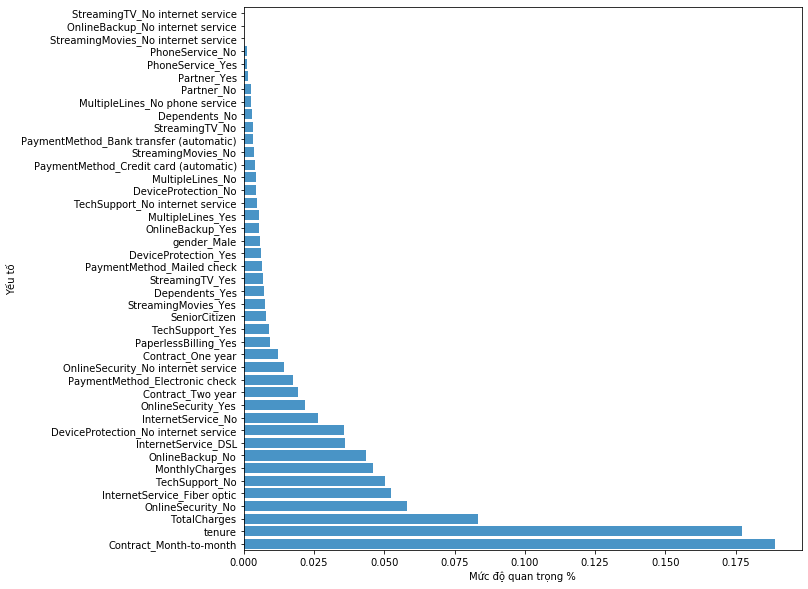

In [13]:
x_values = list(range(len(importances)))
data_important = pd.DataFrame({'x value': x_values,
                               'Mức độ quan trọng %':importances,
                               'Yếu tố':feature_list}).sort_values(by='Mức độ quan trọng %', ascending=True)
plt.figure(figsize = (10, 10))
sns.barplot(x='Mức độ quan trọng %', y='Yếu tố', data=data_important,color='#3498db')

In [14]:
data2=data
X = data2.drop('Churn_Yes',axis = 1)
Y = data2['Churn_Yes']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=2)
feature_list = list(X.columns)
rf = DecisionTreeClassifier(max_depth = randomforest_max)
rf.fit(X_train, Y_train);

importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance*100,2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Var: {:40} & Importance %: {}'.format(*pair)) for pair in feature_importances];

Var: Contract_Month-to-month                  & Importance %: 44.75
Var: TotalCharges                             & Importance %: 15.83
Var: InternetService_Fiber optic              & Importance %: 12.47
Var: MonthlyCharges                           & Importance %: 7.78
Var: tenure                                   & Importance %: 7.54
Var: TechSupport_No                           & Importance %: 2.32
Var: PaymentMethod_Electronic check           & Importance %: 1.86
Var: SeniorCitizen                            & Importance %: 1.59
Var: MultipleLines_No phone service           & Importance %: 0.94
Var: OnlineBackup_Yes                         & Importance %: 0.93
Var: MultipleLines_Yes                        & Importance %: 0.79
Var: PaperlessBilling_Yes                     & Importance %: 0.58
Var: OnlineSecurity_Yes                       & Importance %: 0.55
Var: OnlineBackup_No                          & Importance %: 0.5
Var: Contract_Two year                        & Importance %

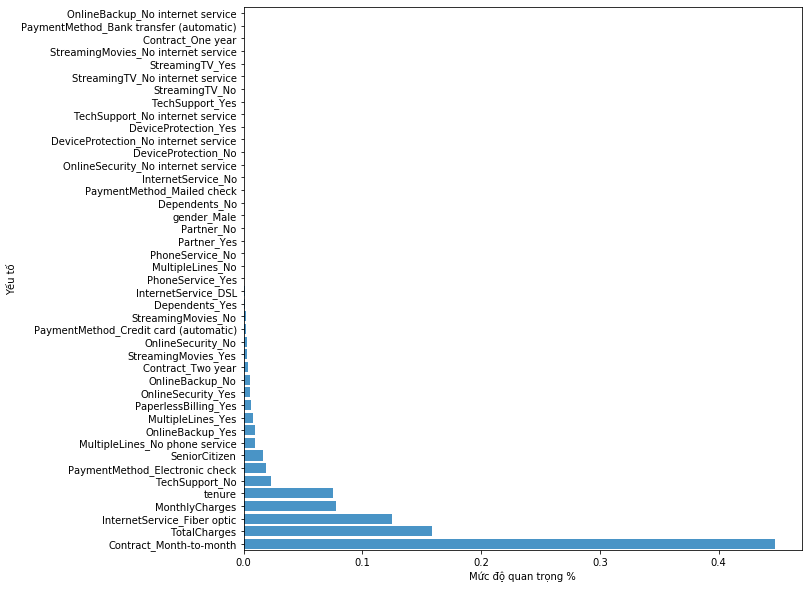

In [15]:
x_values = list(range(len(importances)))
data_important = pd.DataFrame({'x value': x_values,
                               'Mức độ quan trọng %':importances,
                               'Yếu tố':feature_list}).sort_values(by='Mức độ quan trọng %', ascending=True)
plt.figure(figsize = (10, 10))
sns.barplot(x='Mức độ quan trọng %', y='Yếu tố', data=data_important,color='#3498db')

In [36]:
eda = pd.read_csv(r'C:\HỌC TẬP\PYTHON LEARNING\DATA\TelcoChurn.csv')
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [39]:
object_detect = eda.replace('No',0)
object_detect = object_detect.replace('Yes',1)
object_detect.head()
#object_detect = object_detect.drop(['customerID','tenure','TotalCharges','MonthlyCharges' ], axis=1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


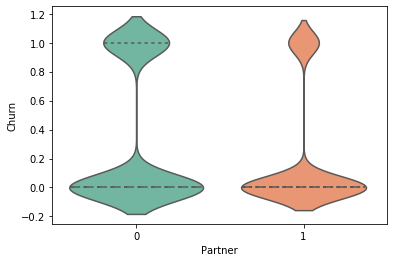

In [40]:
sns.violinplot(x="Partner", y="Churn", data=object_detect, palette="Set2", split=True, scale="count", inner="quartile")

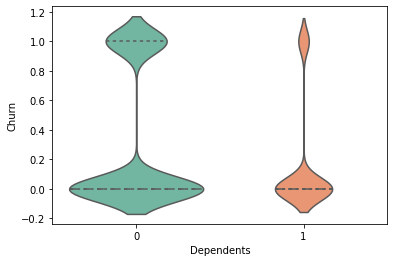

In [41]:
sns.violinplot(x="Dependents", y="Churn", data=object_detect, palette="Set2", split=True, scale="count", inner="quartile")

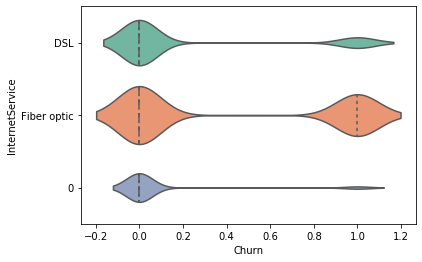

In [45]:
sns.violinplot(x="Churn", y="InternetService", data=object_detect, palette="Set2", split=True, scale="count", inner="quartile")

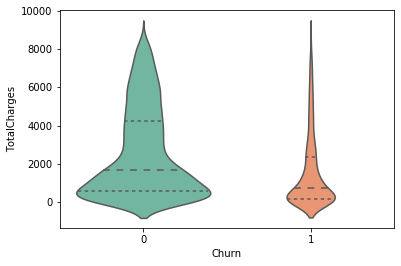

In [44]:
sns.violinplot(x="Churn", y="TotalCharges", data=object_detect, palette="Set2", split=True, scale="count", inner="quartile")